# MATPLOTLIB FORMATTING CHARTS

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Pham Duc Toan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Create a sample subplot

- fig stands for the figure which is the plot that contains those sub-plots
- ax stands the axes which are the sub-plots

--> We can call these 2 objects what the hell we want but these naming conventions are the industry standards 

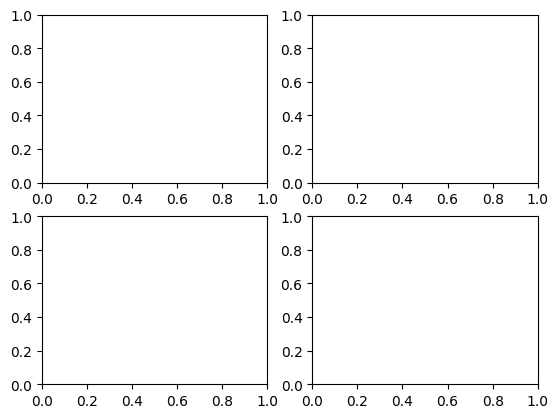

In [5]:
fig, ax = plt.subplots(2,2) # 2 rows and 2 columns


2. Let's try putting two plots in the same figure

- Use the Pandas plotting method first

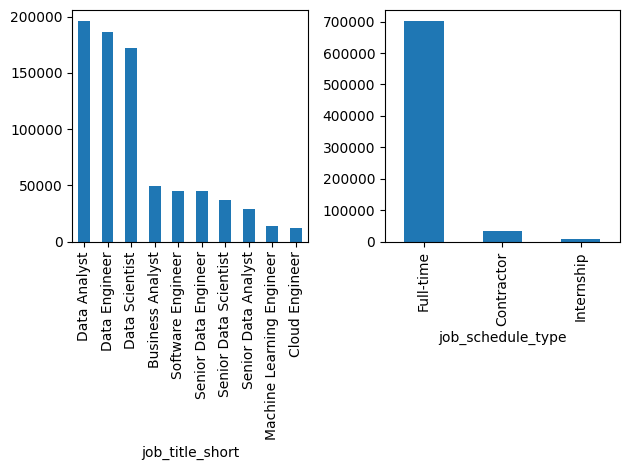

In [13]:
fig, ax = plt.subplots(1, 2)
# if there is more than 1 plot in the figure, have to call the index 
df['job_title_short'].value_counts().plot(kind= 'bar', ax= ax[0]) 
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax = ax[1])

fig.tight_layout() 
# because fig is the whole thing, we use fig's functions/ propreties to do any formats on the whole thing

- And then use the Matplotlib's method later

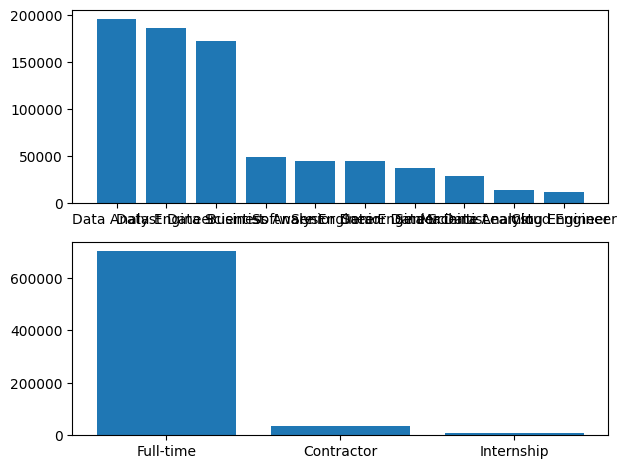

In [16]:
fig, ax = plt.subplots(2,1)

ax[0].bar(df['job_title_short'].value_counts().index,df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index,df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()
plt.show()

3. Create plots showing most demanding skills of each job title

In [21]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_skills_count = skills_count.reset_index(name= 'skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [22]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']


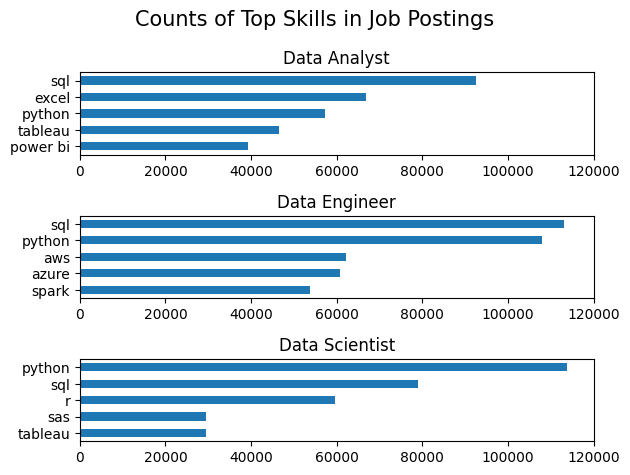

In [49]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count', ax = ax [i], title= job_title)
    ax[i].invert_yaxis() # because it's already an ax, no need to use gca function 
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)


fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 15)
fig.tight_layout() # restructure the layout of the subplots so that they dont overlap


--> I still dont believe that it's "suptitle" instead of "subtitle", what the hell mannnn

--> However, this subplot function is sick as hell bro, I could do a lot of things with this